## "Personal music likes vs. country popularity" report.

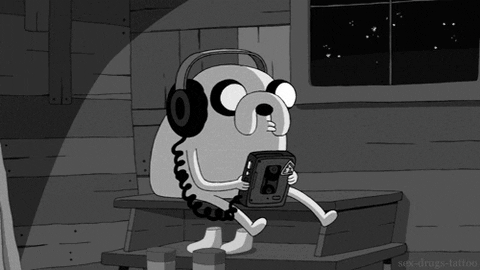

#### by Daniel Popescu 

#### 1. Overview

How does some of the music in one of my playlists compare to what's popular in the country based on danceability? 

The purpose of this report is to compare personal music that I like to what's popular in the country.

In [1]:
import requests
import base64
import six
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

#### First, we begin by inputing ouur spotify keys which are used to pull the data from the Spotify API.

In [2]:
tokens = pd.read_csv('Spotify_Keys.txt', sep = '\t', header = None).T
tokens.columns = tokens.iloc[0]
tokens = tokens[1:]
#tokens.Client_Secret[1]

#### Second, we insert the code for all the tools that we will be using through our project. These are entered in order to help pull said data along with the tokens for it.

In [3]:
def start_session_headers(client_id, client_secret):
    client_cred = base64.b64encode(six.text_type(client_id + ":" + client_secret).encode("ascii"))
    headers = {"Authorization": "Basic %s" % client_cred.decode("ascii")}
    return headers

#print(start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1]))

In [4]:
def connect_to_client_cred(url, headers):
    payload = {'grant_type' : 'client_credentials'}
    response = requests.request("POST", url, headers = headers, data = payload)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [5]:
def get_access_token():
    #Uses the Client Credentials flow, no access to endpoints with user data
    url = "https://accounts.spotify.com/api/token"
    header = start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1])
    json_response = connect_to_client_cred(url, header)

    #return json.dumps(json_response, indent = 4, sort_keys = True)
    return json_response

In [6]:
session_token = get_access_token()

200


In [7]:
#session_token

In [8]:
#session_token['access_token']

In [9]:
def create_header(session_token):
    headers = {"Authorization": "Bearer {}".format(session_token)}
    return headers

#create_header(session_token['access_token'])

In [10]:
def connect_to_endpoint(url, headers):
    response =requests.request("GET", url, headers = headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

#### The track_audio_features will be used to track each feature for the music in the albums and playlists. 

In [11]:
def track_audio_features(id):
    url = 'https://api.spotify.com/v1/audio-features/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

#### Get_an_album will be used to pull the data for an album from Spotify.

In [12]:
def get_an_album(id):
    url = 'https://api.spotify.com/v1/albums/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

#### Get_a_playlist will be used to pull the data for a playlist from Spotify.

In [13]:
def get_a_playlist(id):
    url = 'https://api.spotify.com/v1/playlists/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

## Now we start entering the codes for each album that we want to use for this report as well as the playlist we want it to compare it with. For this I have chosen some of the albums that I like the most.

### GLASS ANIMALS - How To be A Human Being

In [14]:
album = get_an_album('6qb9MDR0lfsN9a2pw77uJy')

200


In [15]:
#album

In [16]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [17]:
album['tracks']['items'][0]['id']

'32zkKx35Et6A515oZKxDkD'

In [18]:
glass_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200


In [19]:
#audio_features

In [20]:
glass_features_df = pd.DataFrame(glass_features)
glass_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.699,0.670,1,-6.219,1,0.0347,0.0147,0.220000,0.356,0.556,111.988,audio_features,32zkKx35Et6A515oZKxDkD,spotify:track:32zkKx35Et6A515oZKxDkD,https://api.spotify.com/v1/tracks/32zkKx35Et6A...,https://api.spotify.com/v1/audio-analysis/32zk...,281407,4
1,0.648,0.718,9,-7.765,0,0.0298,0.1290,0.001560,0.112,0.785,96.017,audio_features,1LPGwuFgIzbJoShfDdw7MY,spotify:track:1LPGwuFgIzbJoShfDdw7MY,https://api.spotify.com/v1/tracks/1LPGwuFgIzbJ...,https://api.spotify.com/v1/audio-analysis/1LPG...,230693,4
2,0.742,0.289,5,-7.833,0,0.1150,0.5430,0.000046,0.228,0.710,147.986,audio_features,4vcoNCrTtunmJ9q8srpVly,spotify:track:4vcoNCrTtunmJ9q8srpVly,https://api.spotify.com/v1/tracks/4vcoNCrTtunm...,https://api.spotify.com/v1/audio-analysis/4vco...,243509,4
3,0.698,0.664,7,-7.828,1,0.0778,0.1210,0.001310,0.331,0.623,96.001,audio_features,5C5gvDZsl6d8bh89URfKHr,spotify:track:5C5gvDZsl6d8bh89URfKHr,https://api.spotify.com/v1/tracks/5C5gvDZsl6d8...,https://api.spotify.com/v1/audio-analysis/5C5g...,253831,4
4,0.460,0.314,6,-10.158,0,0.0267,0.6990,0.000004,0.122,0.216,90.014,audio_features,5o4znEHwozOHIgHoWAllnr,spotify:track:5o4znEHwozOHIgHoWAllnr,https://api.spotify.com/v1/tracks/5o4znEHwozOH...,https://api.spotify.com/v1/audio-analysis/5o4z...,266747,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

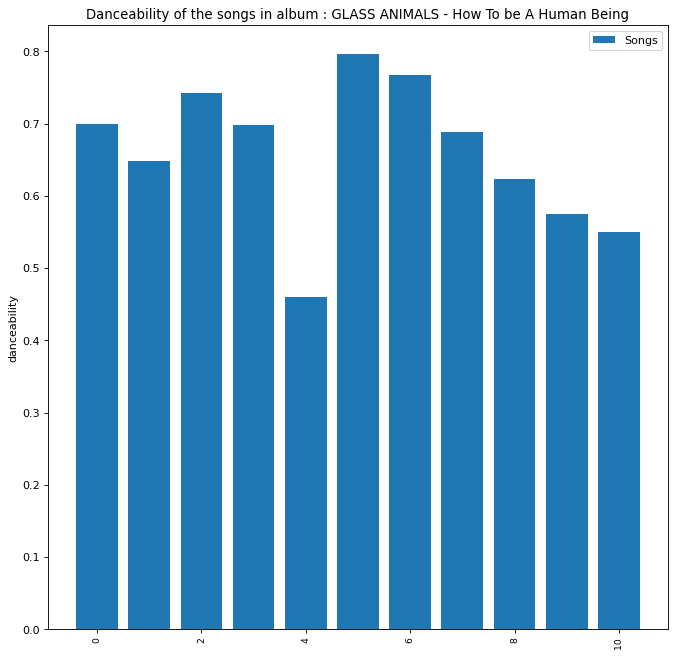

In [21]:
labels = glass_features_df['danceability'].keys()
vals = glass_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : GLASS ANIMALS - How To be A Human Being")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([1., 0., 1., 1., 1., 1., 1., 2., 1., 2.]),
 array([0.46  , 0.4936, 0.5272, 0.5608, 0.5944, 0.628 , 0.6616, 0.6952,
        0.7288, 0.7624, 0.796 ]),
 <BarContainer object of 10 artists>)

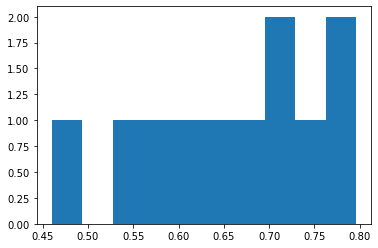

In [22]:
plt.hist(glass_features_df['danceability'])

### JOJI - BALLADS1

In [23]:
album = get_an_album('34GQP3dILpyCN018y2k61L')

200


In [24]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [25]:
album['tracks']['items'][0]['id']

'5aqu5xhPqoOWqF71PkfgM8'

In [26]:
joji_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200


In [27]:
joji_features_df = pd.DataFrame(joji_features)
joji_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.787,0.312,7,-12.401,1,0.0383,0.895,0.02240,0.1150,0.425,119.899,audio_features,5aqu5xhPqoOWqF71PkfgM8,spotify:track:5aqu5xhPqoOWqF71PkfgM8,https://api.spotify.com/v1/tracks/5aqu5xhPqoOW...,https://api.spotify.com/v1/audio-analysis/5aqu...,128888,4
1,0.515,0.479,3,-7.458,1,0.0261,0.544,0.00598,0.1910,0.284,88.964,audio_features,0rKtyWc8bvkriBthvHKY8d,spotify:track:0rKtyWc8bvkriBthvHKY8d,https://api.spotify.com/v1/tracks/0rKtyWc8bvkr...,https://api.spotify.com/v1/audio-analysis/0rKt...,209274,4
2,0.646,0.648,3,-8.602,1,0.0372,0.710,0.00316,0.1080,0.466,75.004,audio_features,1DMEzmAoQIikcL52psptQL,spotify:track:1DMEzmAoQIikcL52psptQL,https://api.spotify.com/v1/tracks/1DMEzmAoQIik...,https://api.spotify.com/v1/audio-analysis/1DME...,179423,4
3,0.305,0.715,7,-7.540,1,0.0554,0.105,0.04950,0.0906,0.290,82.977,audio_features,0Y9D1Bc4fAkeZnVsGKdij6,spotify:track:0Y9D1Bc4fAkeZnVsGKdij6,https://api.spotify.com/v1/tracks/0Y9D1Bc4fAke...,https://api.spotify.com/v1/audio-analysis/0Y9D...,251015,4
4,0.900,0.316,9,-8.797,1,0.3320,0.684,0.07710,0.0853,0.844,129.914,audio_features,39oeKRgsLeynDIbWuXyA47,spotify:track:39oeKRgsLeynDIbWuXyA47,https://api.spotify.com/v1/tracks/39oeKRgsLeyn...,https://api.spotify.com/v1/audio-analysis/39oe...,107077,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

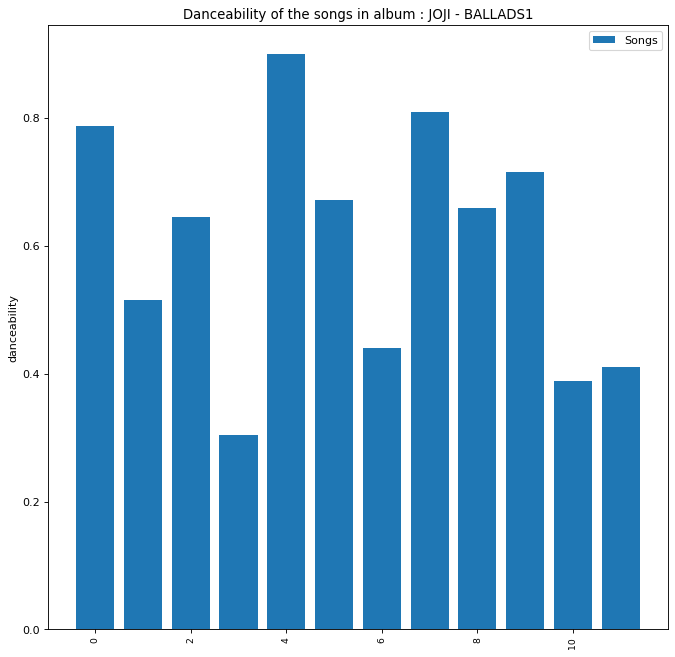

In [28]:
labels = joji_features_df['danceability'].keys()
vals = joji_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : JOJI - BALLADS1")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([1., 2., 1., 1., 0., 2., 2., 0., 2., 1.]),
 array([0.305 , 0.3645, 0.424 , 0.4835, 0.543 , 0.6025, 0.662 , 0.7215,
        0.781 , 0.8405, 0.9   ]),
 <BarContainer object of 10 artists>)

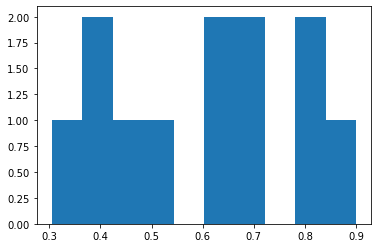

In [29]:
plt.hist(joji_features_df['danceability'])

### BILLIE EILISH - WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?

In [30]:
album = get_an_album('0S0KGZnfBGSIssfF54WSJh')

200


In [31]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [32]:
album['tracks']['items'][0]['id']

'0rQtoQXQfwpDW0c7Fw1NeM'

In [33]:
billie_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [34]:
billie_features_df = pd.DataFrame(billie_features)
billie_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.000,0.278,1,-21.630,1,0.000,0.768,0.00000,0.669,0.0000,0.000,audio_features,0rQtoQXQfwpDW0c7Fw1NeM,spotify:track:0rQtoQXQfwpDW0c7Fw1NeM,https://api.spotify.com/v1/tracks/0rQtoQXQfwpD...,https://api.spotify.com/v1/audio-analysis/0rQt...,13578,0
1,0.701,0.425,7,-10.965,1,0.375,0.328,0.13000,0.100,0.5620,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
2,0.521,0.125,9,-17.832,1,0.239,0.751,0.00207,0.265,0.0528,111.554,audio_features,4QIo4oxwzzafcBWkKjDpXY,spotify:track:4QIo4oxwzzafcBWkKjDpXY,https://api.spotify.com/v1/tracks/4QIo4oxwzzaf...,https://api.spotify.com/v1/audio-analysis/4QIo...,243725,4
3,0.678,0.533,4,-10.485,1,0.186,0.462,0.21900,0.139,0.3230,150.455,audio_features,3XF5xLJHOQQRbWya6hBp7d,spotify:track:3XF5xLJHOQQRbWya6hBp7d,https://api.spotify.com/v1/tracks/3XF5xLJHOQQR...,https://api.spotify.com/v1/audio-analysis/3XF5...,180953,4
4,0.726,0.444,8,-8.922,0,0.372,0.283,0.14300,0.177,0.5690,185.044,audio_features,6IRdLKIyS4p7XNiP8r6rsx,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,https://api.spotify.com/v1/tracks/6IRdLKIyS4p7...,https://api.spotify.com/v1/audio-analysis/6IRd...,168840,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

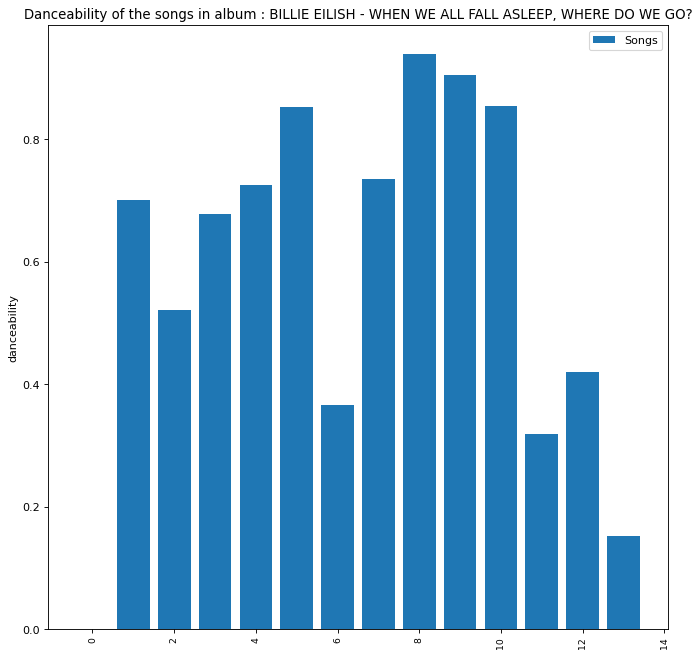

In [35]:
labels = billie_features_df['danceability'].keys()
vals = billie_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : BILLIE EILISH - WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([1., 1., 0., 2., 1., 1., 0., 4., 0., 4.]),
 array([0.    , 0.0939, 0.1878, 0.2817, 0.3756, 0.4695, 0.5634, 0.6573,
        0.7512, 0.8451, 0.939 ]),
 <BarContainer object of 10 artists>)

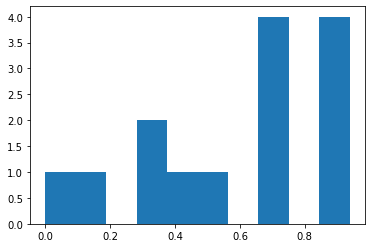

In [36]:
plt.hist(billie_features_df['danceability'])

### KID CUDI - Man On The Moon: The End Of Day

In [37]:
album = get_an_album('47y3PbX8oIDCkYAFylCJz0')

200


In [38]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [39]:
album['tracks']['items'][0]['id']

'3Xm9jQDd8my7ui5DUtEHYf'

In [40]:
kid_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [41]:
kid_features_df = pd.DataFrame(kid_features)
kid_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.650,0.417,2,-12.413,0,0.0574,0.286,0.000033,0.1040,0.475,98.415,audio_features,3Xm9jQDd8my7ui5DUtEHYf,spotify:track:3Xm9jQDd8my7ui5DUtEHYf,https://api.spotify.com/v1/tracks/3Xm9jQDd8my7...,https://api.spotify.com/v1/audio-analysis/3Xm9...,199000,4
1,0.464,0.754,9,-6.653,0,0.1280,0.465,0.000016,0.3700,0.444,86.501,audio_features,1cdC9TCqyLwAlsw3fVJaJS,spotify:track:1cdC9TCqyLwAlsw3fVJaJS,https://api.spotify.com/v1/tracks/1cdC9TCqyLwA...,https://api.spotify.com/v1/audio-analysis/1cdC...,235627,4
2,0.802,0.742,1,-4.607,1,0.1110,0.265,0.000287,0.6300,0.512,95.000,audio_features,77fcAXl6MsFPtFJG45zTUE,spotify:track:77fcAXl6MsFPtFJG45zTUE,https://api.spotify.com/v1/tracks/77fcAXl6MsFP...,https://api.spotify.com/v1/audio-analysis/77fc...,151333,4
3,0.768,0.449,7,-7.569,0,0.0290,0.518,0.000463,0.1360,0.614,79.120,audio_features,2EHEQx2avP1fNBLJf5UGYy,spotify:track:2EHEQx2avP1fNBLJf5UGYy,https://api.spotify.com/v1/tracks/2EHEQx2avP1f...,https://api.spotify.com/v1/audio-analysis/2EHE...,266307,4
4,0.723,0.452,11,-9.420,0,0.0328,0.308,0.006400,0.0923,0.375,125.015,audio_features,246SdvVYT3yrZPXU7NSWwy,spotify:track:246SdvVYT3yrZPXU7NSWwy,https://api.spotify.com/v1/tracks/246SdvVYT3yr...,https://api.spotify.com/v1/audio-analysis/246S...,261360,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

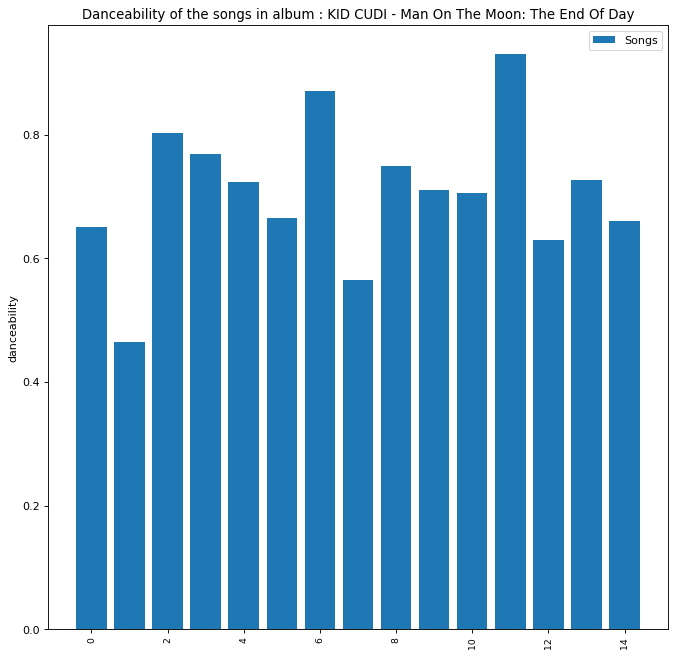

In [42]:
labels = kid_features_df['danceability'].keys()
vals = kid_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : KID CUDI - Man On The Moon: The End Of Day")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([1., 0., 1., 2., 2., 4., 2., 1., 1., 1.]),
 array([0.464 , 0.5106, 0.5572, 0.6038, 0.6504, 0.697 , 0.7436, 0.7902,
        0.8368, 0.8834, 0.93  ]),
 <BarContainer object of 10 artists>)

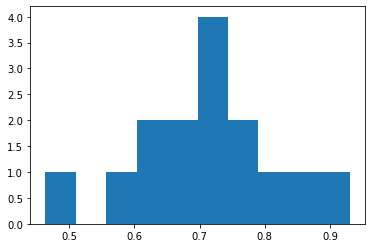

In [43]:
plt.hist(kid_features_df['danceability'])

### KID CUDI - Passion, Pain & Demon Slayin'

In [44]:
album = get_an_album('5bCk3kWAy2JbbTfHqzZCII')

200


In [45]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [46]:
album['tracks']['items'][0]['id']

'0O6jl8Zamz6TGF0nUwMQsF'

In [47]:
cudi_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [48]:
cudi_features_df = pd.DataFrame(cudi_features)
cudi_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.791,0.577,1,-6.555,1,0.0367,0.4980,0.470000,0.120,0.217,115.070,audio_features,0O6jl8Zamz6TGF0nUwMQsF,spotify:track:0O6jl8Zamz6TGF0nUwMQsF,https://api.spotify.com/v1/tracks/0O6jl8Zamz6T...,https://api.spotify.com/v1/audio-analysis/0O6j...,298240,4
1,0.357,0.377,2,-10.723,1,0.0428,0.6100,0.371000,0.110,0.116,165.208,audio_features,5cjsgbZ8tZYD4f0LNpApnf,spotify:track:5cjsgbZ8tZYD4f0LNpApnf,https://api.spotify.com/v1/tracks/5cjsgbZ8tZYD...,https://api.spotify.com/v1/audio-analysis/5cjs...,269227,3
2,0.595,0.442,7,-11.115,0,0.0289,0.1160,0.770000,0.114,0.134,81.992,audio_features,5Tm9At0xeFb0MtlV8uI3eY,spotify:track:5Tm9At0xeFb0MtlV8uI3eY,https://api.spotify.com/v1/tracks/5Tm9At0xeFb0...,https://api.spotify.com/v1/audio-analysis/5Tm9...,327973,4
3,0.756,0.850,9,-5.885,0,0.0538,0.0559,0.000809,0.111,0.415,100.005,audio_features,5FxVTEpoBress37MmlMhbZ,spotify:track:5FxVTEpoBress37MmlMhbZ,https://api.spotify.com/v1/tracks/5FxVTEpoBres...,https://api.spotify.com/v1/audio-analysis/5FxV...,257053,4
4,0.661,0.596,9,-8.176,0,0.0801,0.0391,0.331000,0.943,0.538,154.017,audio_features,4HMhDkyOObFngSAz2xeQhK,spotify:track:4HMhDkyOObFngSAz2xeQhK,https://api.spotify.com/v1/tracks/4HMhDkyOObFn...,https://api.spotify.com/v1/audio-analysis/4HMh...,250587,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

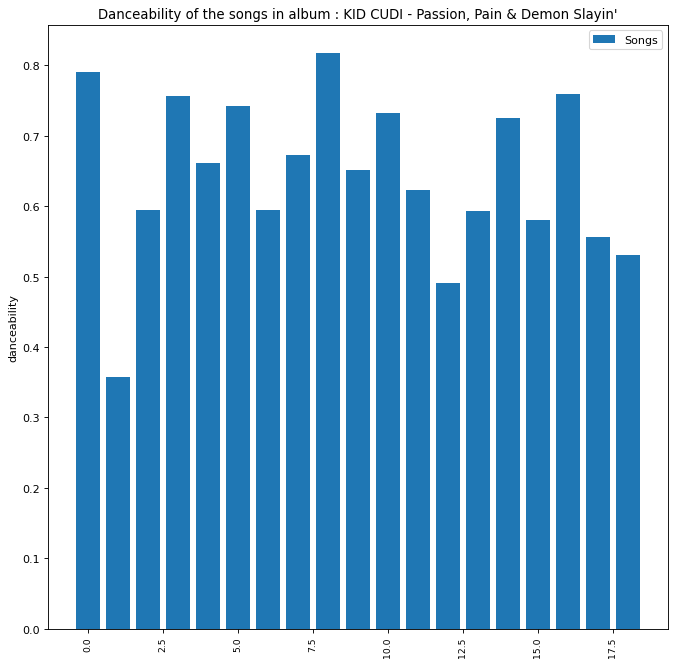

In [49]:
labels = cudi_features_df['danceability'].keys()
vals = cudi_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : KID CUDI - Passion, Pain & Demon Slayin'")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([1., 0., 1., 1., 2., 4., 3., 0., 5., 2.]),
 array([0.357, 0.403, 0.449, 0.495, 0.541, 0.587, 0.633, 0.679, 0.725,
        0.771, 0.817]),
 <BarContainer object of 10 artists>)

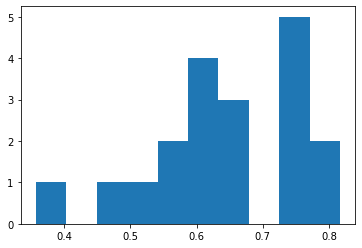

In [50]:
plt.hist(cudi_features_df['danceability'])

### TAME IMPALA - Currents

In [51]:
album = get_an_album('79dL7FLiJFOO0EoehUHQBv')

200


In [52]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [53]:
album['tracks']['items'][0]['id']

'2X485T9Z5Ly0xyaghN73ed'

In [54]:
impala_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200


In [55]:
impala_features_df = pd.DataFrame(impala_features)
impala_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.602,0.881,1,-5.875,0,0.0443,0.004620,0.026600,0.1110,0.577,125.012,audio_features,2X485T9Z5Ly0xyaghN73ed,spotify:track:2X485T9Z5Ly0xyaghN73ed,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,https://api.spotify.com/v1/audio-analysis/2X48...,467587,4
1,0.536,0.526,0,-9.754,1,0.1810,0.159000,0.847000,0.1280,0.434,167.608,audio_features,1cCbsojaA6GIT7Y3zuMJ1q,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,https://api.spotify.com/v1/audio-analysis/1cCb...,107533,4
2,0.547,0.827,7,-6.036,1,0.0468,0.000296,0.101000,0.0858,0.451,119.089,audio_features,1UYj8qTWjneZJDVjUMwMub,spotify:track:1UYj8qTWjneZJDVjUMwMub,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,https://api.spotify.com/v1/audio-analysis/1UYj...,255413,4
3,0.373,0.609,0,-7.000,1,0.0316,0.108000,0.000427,0.0755,0.354,179.955,audio_features,0xtIp0lgccN85GfGOekS5L,spotify:track:0xtIp0lgccN85GfGOekS5L,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,https://api.spotify.com/v1/audio-analysis/0xtI...,270680,4
4,0.424,0.615,9,-6.217,0,0.0325,0.015800,0.000389,0.0844,0.155,77.935,audio_features,5M4yti0QxgqJieUYaEXcpw,spotify:track:5M4yti0QxgqJieUYaEXcpw,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,https://api.spotify.com/v1/audio-analysis/5M4y...,318591,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

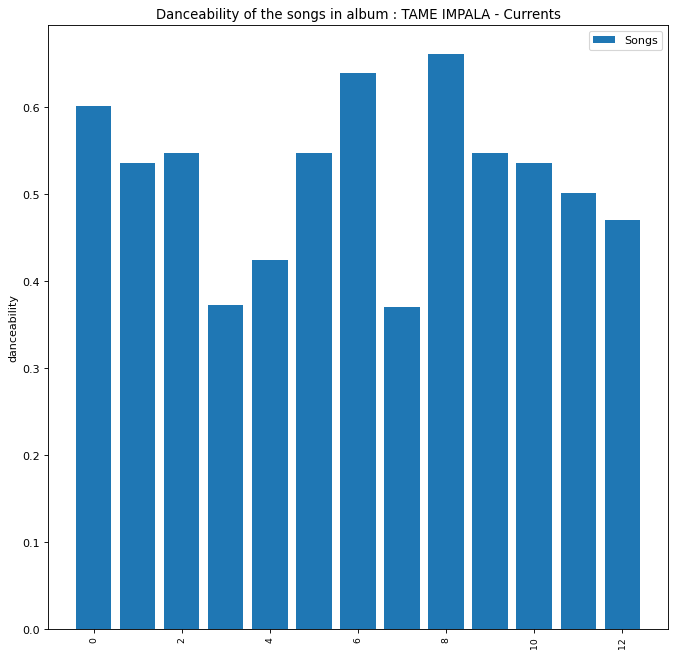

In [56]:
labels = impala_features_df['danceability'].keys()
vals = impala_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : TAME IMPALA - Currents")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([2., 1., 0., 1., 1., 2., 3., 1., 0., 2.]),
 array([0.371, 0.4  , 0.429, 0.458, 0.487, 0.516, 0.545, 0.574, 0.603,
        0.632, 0.661]),
 <BarContainer object of 10 artists>)

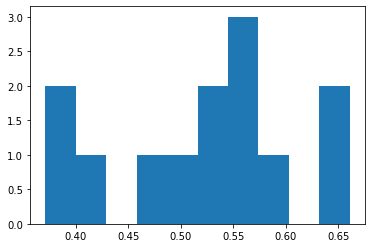

In [57]:
plt.hist(impala_features_df['danceability'])

### MAC MILLER - Swimming

In [58]:
album = get_an_album('5wtE5aLX5r7jOosmPhJhhk')

200


In [59]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [60]:
album['tracks']['items'][0]['id']

'01z2fBGB8Hl3Jd3zXe4IXR'

In [61]:
miller_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200


In [62]:
miller_features_df = pd.DataFrame(miller_features)
miller_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.272,0.238,2,-12.148,0,0.0349,0.890,0.00925,0.275,0.119,83.507,audio_features,01z2fBGB8Hl3Jd3zXe4IXR,spotify:track:01z2fBGB8Hl3Jd3zXe4IXR,https://api.spotify.com/v1/tracks/01z2fBGB8Hl3...,https://api.spotify.com/v1/audio-analysis/01z2...,161840,4
1,0.690,0.462,8,-8.054,1,0.1300,0.343,0.00218,0.113,0.325,157.655,audio_features,5p7GiBZNL1afJJDUrOA6C8,spotify:track:5p7GiBZNL1afJJDUrOA6C8,https://api.spotify.com/v1/tracks/5p7GiBZNL1af...,https://api.spotify.com/v1/audio-analysis/5p7G...,245640,4
2,0.759,0.492,1,-10.338,0,0.1200,0.736,0.00989,0.107,0.561,104.974,audio_features,2dgrYdgguVZKeCsrVb9XEs,spotify:track:2dgrYdgguVZKeCsrVb9XEs,https://api.spotify.com/v1/tracks/2dgrYdgguVZK...,https://api.spotify.com/v1/audio-analysis/2dgr...,288640,4
3,0.599,0.317,1,-11.212,1,0.1740,0.748,0.00000,0.111,0.203,148.090,audio_features,0Xcy81PsJCOO6mhLZaQyQ4,spotify:track:0Xcy81PsJCOO6mhLZaQyQ4,https://api.spotify.com/v1/tracks/0Xcy81PsJCOO...,https://api.spotify.com/v1/audio-analysis/0Xcy...,215413,4
4,0.520,0.538,1,-8.109,1,0.2060,0.367,0.00187,0.119,0.177,141.894,audio_features,5bJ1DrEM4hNCafcDd1oxHx,spotify:track:5bJ1DrEM4hNCafcDd1oxHx,https://api.spotify.com/v1/tracks/5bJ1DrEM4hNC...,https://api.spotify.com/v1/audio-analysis/5bJ1...,345133,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

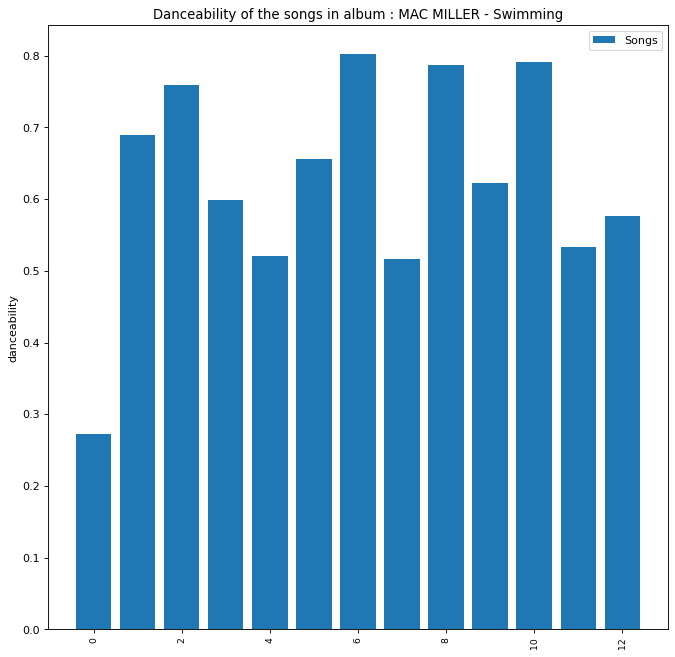

In [63]:
labels = miller_features_df['danceability'].keys()
vals = miller_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in album : MAC MILLER - Swimming")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([1., 0., 0., 0., 3., 1., 2., 2., 0., 4.]),
 array([0.272, 0.325, 0.378, 0.431, 0.484, 0.537, 0.59 , 0.643, 0.696,
        0.749, 0.802]),
 <BarContainer object of 10 artists>)

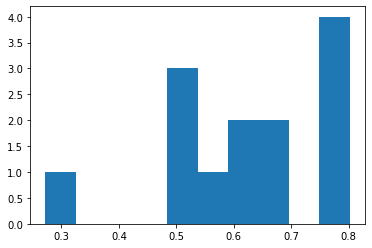

In [64]:
plt.hist(miller_features_df['danceability'])

### PLAYLIST - TOP 50 USA

In [65]:
playlist = get_a_playlist('37i9dQZEVXbLRQDuF5jeBp')

200


In [66]:
type(playlist['tracks']['items'])

list

In [67]:
playlist['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [68]:
type(playlist['tracks']['items'][0]['track'])

dict

In [69]:
playlist['tracks']['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [70]:
top_features = [track_audio_features(x['track']['id']) for x in playlist['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [71]:
top_features_df = pd.DataFrame(top_features)
top_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.762,0.701,8,-3.541,1,0.0286,0.2350,0.000158,0.123,0.742,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4
1,0.789,0.536,6,-6.862,1,0.2420,0.4100,0.000000,0.129,0.437,81.039,audio_features,43PGPuHIlVOc04jrZVh9L6,spotify:track:43PGPuHIlVOc04jrZVh9L6,https://api.spotify.com/v1/tracks/43PGPuHIlVOc...,https://api.spotify.com/v1/audio-analysis/43PG...,165926,4
2,0.584,0.859,8,-5.616,1,0.1210,0.0144,0.000000,0.847,0.369,77.005,audio_features,2BITQ360Knh6qNAOqR7Dyq,spotify:track:2BITQ360Knh6qNAOqR7Dyq,https://api.spotify.com/v1/tracks/2BITQ360Knh6...,https://api.spotify.com/v1/audio-analysis/2BIT...,236883,4
3,0.604,0.668,1,-3.525,1,0.1150,0.1100,0.000000,0.407,0.114,100.854,audio_features,2gyYjQWXKxemhAyMPgctIx,spotify:track:2gyYjQWXKxemhAyMPgctIx,https://api.spotify.com/v1/tracks/2gyYjQWXKxem...,https://api.spotify.com/v1/audio-analysis/2gyY...,131413,3
4,0.610,0.508,8,-6.682,0,0.1520,0.2970,0.000000,0.384,0.758,178.818,audio_features,67BtfxlNbhBmCDR2L2l8qd,spotify:track:67BtfxlNbhBmCDR2L2l8qd,https://api.spotify.com/v1/tracks/67BtfxlNbhBm...,https://api.spotify.com/v1/audio-analysis/67Bt...,137876,4


### This following graph is meant to show the danceability for the Top 50 playlist.

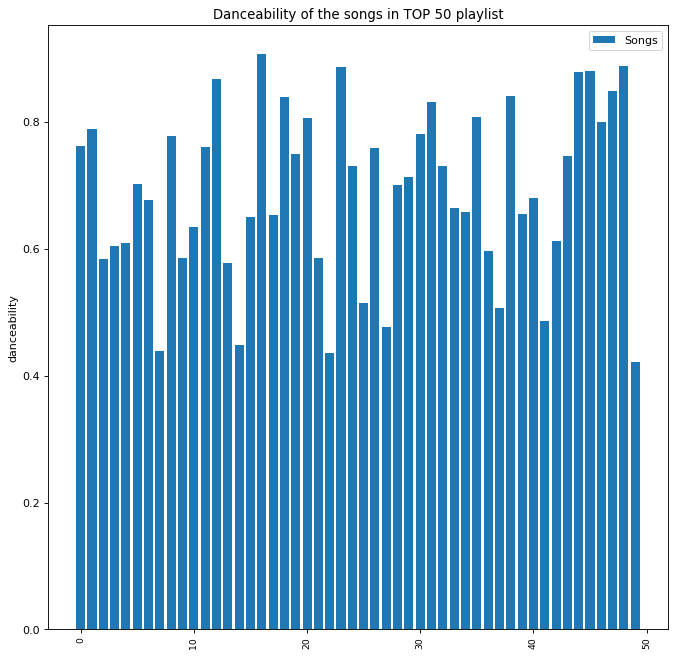

In [72]:
labels = top_features_df['danceability'].keys()
vals = top_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.legend(['Songs'])
ax.set_title("Danceability of the songs in TOP 50 playlist")
plt.show()

This second following plot uses the data from above, but instead it combines all the songs under their respective danceability. 

This means that the Y-axis in this case is the number of songs and the X-axis is the danceability rating for those songs.

(array([4., 4., 0., 8., 6., 5., 6., 7., 4., 6.]),
 array([0.422 , 0.4705, 0.519 , 0.5675, 0.616 , 0.6645, 0.713 , 0.7615,
        0.81  , 0.8585, 0.907 ]),
 <BarContainer object of 10 artists>)

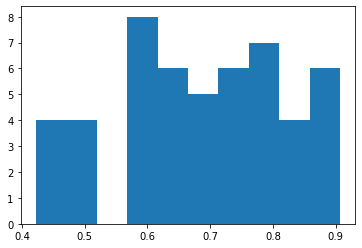

In [73]:
plt.hist(top_features_df['danceability'])

### Next I am trying to compare both plots and see how the data matches danceability wise if at all.

First I will be putting each plt.hist() from all the albums and the playlist on top of each other to compare the danceability for all of them.

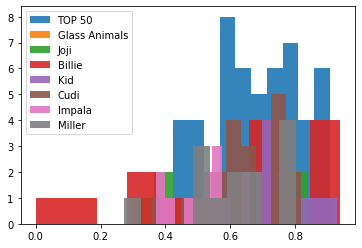

In [74]:
fig, ax1 = plt.subplots(1,1)

ax1.hist(top_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(glass_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(joji_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(billie_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(kid_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(cudi_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(impala_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
ax1.hist(miller_features_df['danceability'], alpha = 0.9, histtype = 'barstacked')
plt.legend(['TOP 50', 'Glass Animals', 'Joji', 'Billie', 'Kid', 'Cudi', 'Impala', 'Miller'])
plt.show()

From this plot, having all of the albums and the playlist layed out on each other, we can tell that the overall danceability for the TOP 50 playlist is definitely way higher than any album listed.

### We are now going to turn it into a T-test to better visualize this data and help the reader better understand it.

In [75]:
from scipy import stats
import numpy as np

First we start by entering all of our data for the albums and playlist that will be used in the T-test.

In [76]:
obs = np.array([top_features_df['danceability']])
obs

array([[0.762, 0.789, 0.584, 0.604, 0.61 , 0.702, 0.677, 0.439, 0.778,
        0.586, 0.634, 0.761, 0.868, 0.578, 0.449, 0.65 , 0.907, 0.653,
        0.84 , 0.749, 0.807, 0.585, 0.436, 0.887, 0.731, 0.514, 0.759,
        0.477, 0.701, 0.713, 0.781, 0.832, 0.731, 0.664, 0.658, 0.808,
        0.597, 0.507, 0.841, 0.655, 0.68 , 0.487, 0.612, 0.746, 0.879,
        0.88 , 0.8  , 0.849, 0.888, 0.422]])

In [77]:
obs = np.array([glass_features_df['danceability']])
obs

array([[0.699, 0.648, 0.742, 0.698, 0.46 , 0.796, 0.767, 0.689, 0.623,
        0.575, 0.55 ]])

In [78]:
stats.chisquare(obs)

Power_divergenceResult(statistic=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), pvalue=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]))

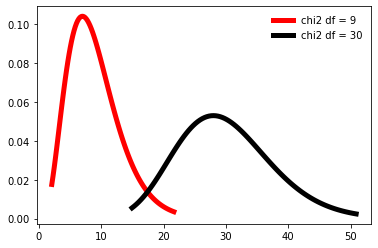

In [79]:
fig, ax1 = plt.subplots(1,1)
df1 = 9
x1 = np.linspace(stats.chi2.ppf(0.01, df1), stats.chi2.ppf(0.99, df1), 100)
ax1.plot(x1, stats.chi2.pdf(x1, df1), 'r-', lw = 5, label = 'chi2 df = 9')
df2 = 30
x2 = np.linspace(stats.chi2.ppf(0.01, df2), stats.chi2.ppf(0.99, df2), 100)
ax1.plot(x2, stats.chi2.pdf(x2, df2), 'k-', lw = 5, label = 'chi2 df = 30')
ax1.legend(loc = 'best', frameon = False)
plt.show()

### Conclusion.